# Loading radiocarbon dates from a spreadsheet or CSV file

This tutorial is useful if you have a spreadsheet or CSV file with radiocarbon dates that you want to load, calibrate and plot with IOSACal.

It's assumed that you have followed the steps in [](#installation).

The first step is to import the building block of IOSACal, the `R` command (it's a short version of the full `RadiocarbonDetermination` name of the command).

In [30]:
from iosacal import R

Let's imagine you have six dates you want to calibrate and plot together. In plain Python, you can create a tuple or a list containing six `R` items, like this:

In [3]:
catalöyük_east_level_vi_a = (
    R(date=7729, sigma=80, id="P-1365"),
    R(date=7661, sigma=99, id="P-1375"),
    R(date=7579, sigma=86, id="P-827"),
    R(date=7572, sigma=92, id="P-772"),
    R(date=7538, sigma=89, id="P-778"),
    R(date=7505, sigma=93, id="P-769")
)

Obviously, entering data like this in a Jupyter notebook can get quickly tedious and error prone. We're in a programming environment, so let's take advantage of that.

If the six dates are saved in a CSV file, they can be loaded with the `csv.DictReader` command from the Python standard library.

For convenience, in this tutorial the CSV file has three columns (fields) named _date_, _sigma_ and _id_, exactly as the parameters of the `R` function. This is not necessary, however, and the CSV file can have more columns, or have different names.

Each date is loaded in a `row` item and we can print it as we iterate through all the data from the CSV file.

In [23]:
from csv import DictReader

with open("dates.csv") as dates:
    dr = DictReader(dates)
    for row in dr:
        print(row)

{'date': '7729', 'sigma': '80', 'id': 'P-1365'}
{'date': '7661', 'sigma': '99', 'id': 'P-1375'}
{'date': '7579', 'sigma': '86', 'id': 'P-827'}
{'date': '7572', 'sigma': '92', 'id': 'P-772'}
{'date': '7538', 'sigma': '89', 'id': 'P-778'}
{'date': '7505', 'sigma': '93', 'id': 'P-769'}


We can build on this by calling the `R` command on each `row`.

Please note that you need to explicitly tell Python that the _date_ and _sigma_ fields are numeric integer values with the `int()` function.

In [43]:
with open("dates.csv") as dates:
    dr = DictReader(dates)
    for row in dr:
        uncal = R(
            int(row["date"]),
            int(row["sigma"]),
            row["id"]
        )
        print(uncal)

RadiocarbonSample( P-1365 : 7729 ± 80 )
RadiocarbonSample( P-1375 : 7661 ± 99 )
RadiocarbonSample( P-827 : 7579 ± 86 )
RadiocarbonSample( P-772 : 7572 ± 92 )
RadiocarbonSample( P-778 : 7538 ± 89 )
RadiocarbonSample( P-769 : 7505 ± 93 )


Neat! IOSACal was able to load each radiocarbon determination.

Now it's time to put all dates together as we manually did at the beginning of the tutorial. There are several ways to create a list of items in Python, this is not the most "pythonic" but it's more clear:

In [38]:
calibrated_dates = [] # an empty list

with open("dates.csv") as dates:
    dr = DictReader(dates)
    for row in dr:
        uncal = R(
            int(row["date"]),
            int(row["sigma"]),
            row["id"]
        )
        cal = uncal.calibrate("intcal20")
        calibrated_dates.append(cal)

If we look at the `calibrated_dates` list, it contains six `CalAge` items, each item is the calibrated date corresponding to the uncalibrated date from the CSV file.

In [39]:
calibrated_dates

[CalAge([[9.02100000e+03, 3.92784281e-08],
         [9.02000000e+03, 4.85191138e-08],
         [9.01900000e+03, 5.64501812e-08],
         ...,
         [8.17600000e+03, 1.14218050e-07],
         [8.17500000e+03, 8.72043365e-08],
         [8.17400000e+03, 6.80115020e-08]]),
 CalAge([[9.08300000e+03, 3.22843034e-08],
         [9.08200000e+03, 3.69285830e-08],
         [9.08100000e+03, 4.22125083e-08],
         ...,
         [7.97600000e+03, 4.44023873e-08],
         [7.97500000e+03, 4.00083797e-08],
         [7.97400000e+03, 3.49544048e-08]]),
 CalAge([[8.98800000e+03, 4.79124169e-08],
         [8.98700000e+03, 5.75837259e-08],
         [8.98600000e+03, 6.91284814e-08],
         ...,
         [7.97100000e+03, 8.64508537e-08],
         [7.97000000e+03, 7.44674428e-08],
         [7.96900000e+03, 6.41687660e-08]]),
 CalAge([[8.99300000e+03, 3.94036941e-08],
         [8.99200000e+03, 5.20032974e-08],
         [8.99100000e+03, 6.83947509e-08],
         ...,
         [7.94300000e+03, 6.1281441

Now all dates that we are interested in are calibrated and loaded in a list.

We can plot them together using the `iplot` command.

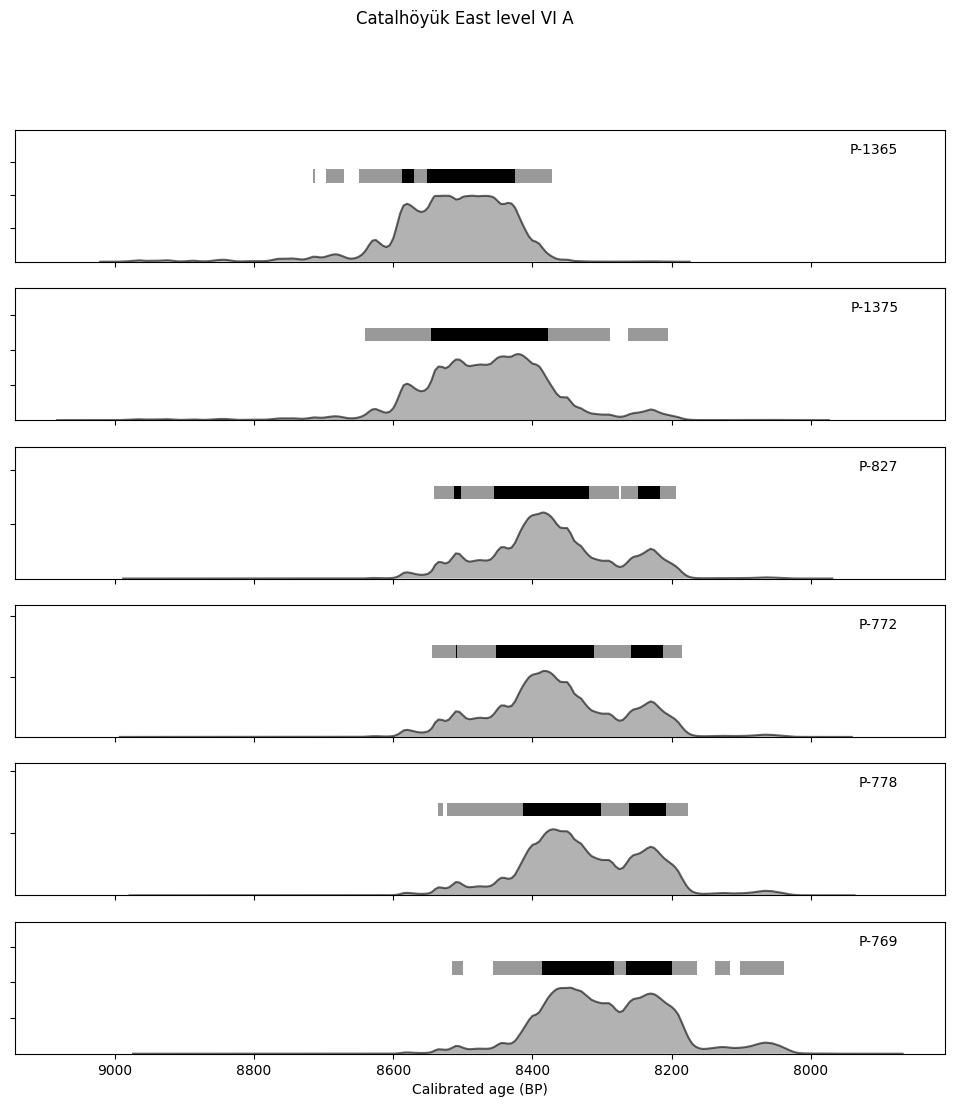

In [42]:
from iosacal import iplot

iplot(calibrated_dates, name="Catalhöyük East level VI A")